### Autoencoder auf dem MNIST 28x28 Datensatz
- 28x28 Pixel Bilder handgeschriebener amerikanischer Ziffern

#### Versionsgeschichte

- 1.0 23.11.2023 Willi Hahn Initialversion
          angepasst nach blog.keras.io/building-autoencoders-in-keras.html, keras.io/examples/vision/autoencoder/
- 1.5 13.08.2024 Willi Hahn überarbeitet
      


In [1]:
#!pip install tensorflow # oder conda

In [2]:
# Bibliotheken laden
# falls noch nicht installiert, siehe Vorlesung 3 oder !pip install keras
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from timeit import default_timer as timer

from sklearn.metrics import confusion_matrix



In [3]:
# Daten einlesen, skalieren
(X_train, _), (X_test, _) = mnist.load_data() # dataset alreday prepaed in keras libary
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Skalierung
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Flattening für FNN
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# Daten zusätzlich verrauschen
noise_factor = 0.25
X_train = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train = np.clip(X_train, 0., 1.)
X_test = np.clip(X_test, 0., 1.)

In [5]:
# Einfaches FNN Nodell in tensorflow definieren mit einer verdeckten Schicht und 64 Neuronen und trainieren.

input_size = 784
hidden_size = 64
output_size = 784

x = Input(shape=(input_size,)) # define input layer
h = Dense(hidden_size, activation='relu')(x) # define dense connect hidden layer
r = Dense(output_size, activation='sigmoid')(h) # define dense connect output  layer

t0 = timer()
autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

epochs = 5
batch_size = 128 # 60000 daten / 128 = 469 Durchgänge je Epoche
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test))
t1 = timer()
print ('\nLaufzeit autoencoder compile & fit = ', round(t1 - t0, 0), ' sec')
#autoencoder.summary()


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0698 - val_loss: 0.0369
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0351 - val_loss: 0.0309
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0304 - val_loss: 0.0288
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0286 - val_loss: 0.0277
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0277 - val_loss: 0.0273

Laufzeit autoencoder compile & fit =  10.0  sec


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


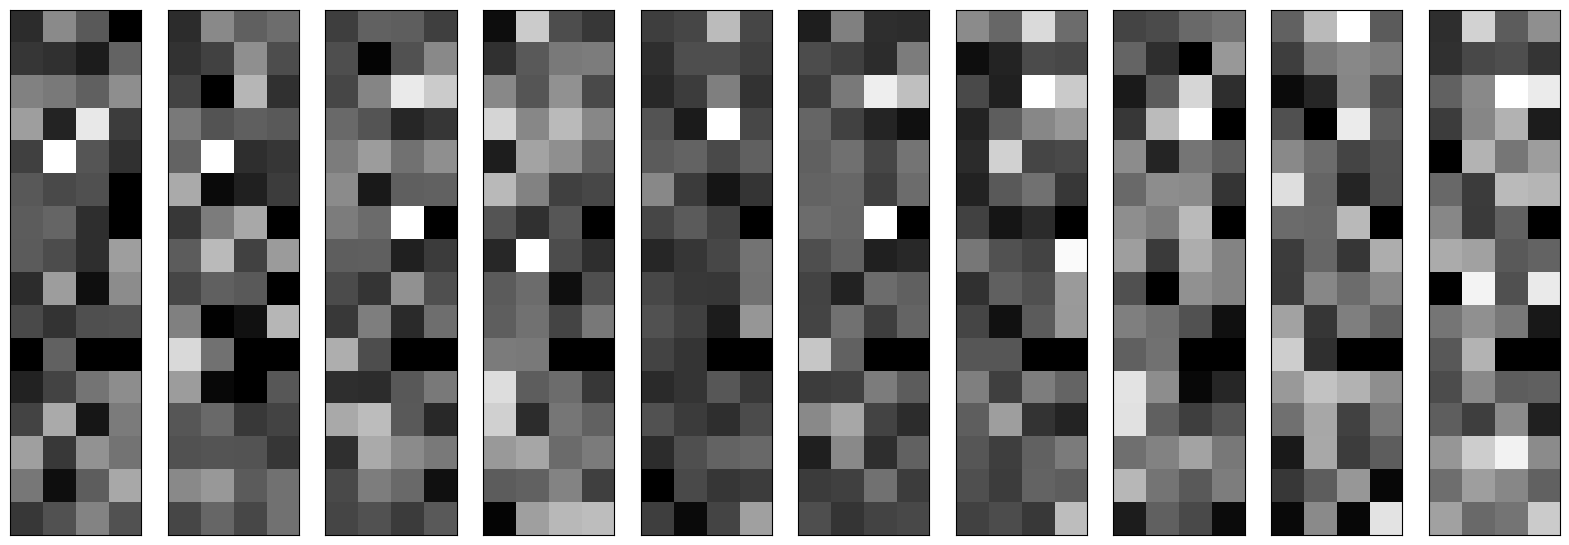

In [6]:
# Ausgabe der verdeckten schicht
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


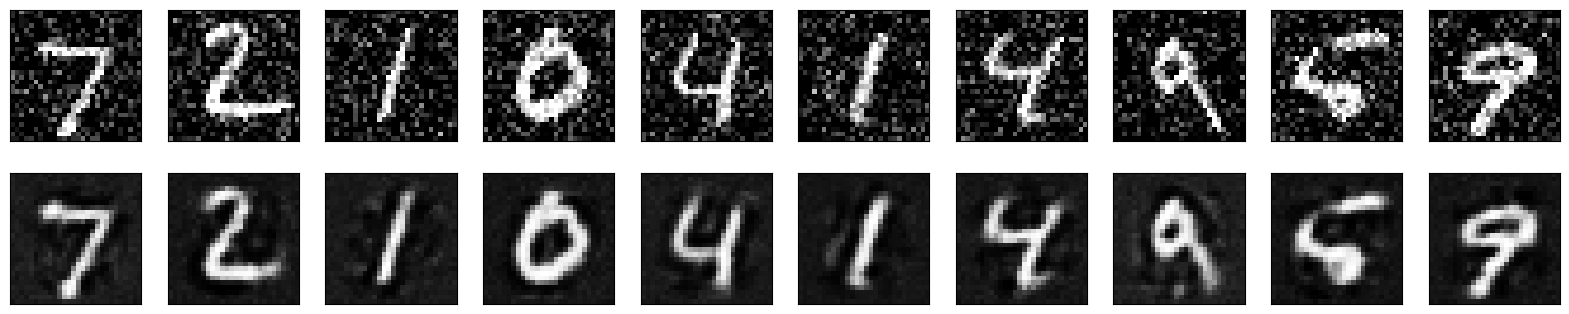

dict_keys(['loss', 'val_loss'])


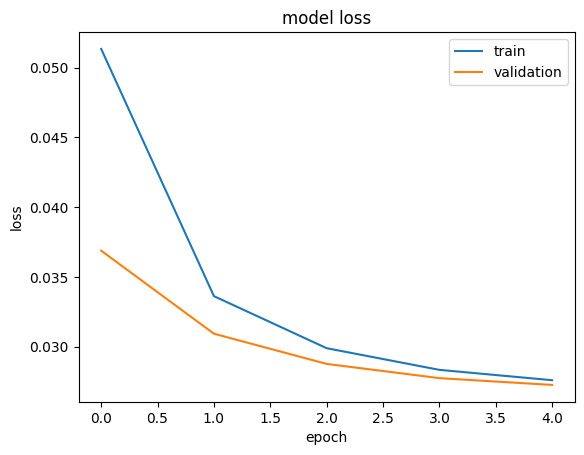

In [7]:
# Vorhersage auf den Testdaten und Ausgabe der ersten 10 Ziffern, sowie der Lernkurve
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



# Ausgabe der Verlustfunktion
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
